# House Price Prediction Model

In the first part of this project, I analysed the data for houses sold in the Prairies & West Coast Regions of Canada. 

Then I used the analysis to answer questions about how the increase in mortgage rates has affected house price and demand.

Now, I will use this data to train a model to predict the sale price of houses based on different features 

In [124]:
import pandas as pd
import datetime
from matplotlib import dates, pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate

In [125]:
#Get the house price data
house_data = pd.read_csv('canada_house_prices.csv').iloc[:,2:]
house_data.head(4)

,id,slug,assessmentClass,zoning,accountNumber,creaListing,bathroomsTotal,bedroomsTotal,livingArea,lotSizeArea,...,city,cityName,neighbourhood,neighbourhoodName,postal,location,closeDate,closePrice,predictedDate,predictedValue
0,ck0eciad49zr70791aj17n7aa,38-discovery-ridge-mount-sw-calgary-ab,Residential,Residential - One Dwelling District (R-1),200126993.0,NaN,3.1,8.0,2718.0,629.970271,...,ck05d79rf1v0w0791peva9z42,Calgary,ck30mnii0028k070615job5pz,Discovery Ridge,T3H5G3,"{'lat': 51.0184791, 'lon': -114.2153508}",2022-11-15T00:00:00.000Z,913900,2023-01-16T00:00:00.000Z,939000.0
1,ck0ej8oduk2yg0791jmtltcqo,72-cityside-manor-ne-calgary-ab,Residential,"Direct Control District, (DC)",202487617.0,NaN,2.1,3.0,1364.0,150.966184,...,ck05d79rf1v0w0791peva9z42,Calgary,ck30mnjn602pq0706uawjh453,Cityscape,T3N1H7,"{'lat': 51.146239, 'lon': -113.965384}",2022-10-27T00:00:00.000Z,450000,2023-01-16T00:00:00.000Z,480600.0
2,599258d80e39c7eaa4732691,7117-21-avenue-sw-edmonton-ab,Residential,RF4,10123584.0,NaN,4.0,3.0,1114.0,267.000000,...,cjykgio0t000s0705d4j9nd8h,Edmonton,ck30mngnb01je07062o5kh63r,Summerside,T6X0L5,"{'lat': 53.4140358, 'lon': -113.4517593}",2022-12-14T00:00:00.000Z,395000,2023-01-16T00:00:00.000Z,404800.0
3,ckcy3dtwrllqg0718yqb1d3sf,313-10157-university-dr-surrey-bc,Condo,RM-70,NaN,NaN,NaN,NaN,NaN,NaN,...,ckcdtw9cf00800870kgxeg4bj,Surrey,ckcqt6fnz04r20770zn5oc7vi,Whalley,V3T5L7,"{'lat': 49.18718447, 'lon': -122.8518087}",2022-09-26T00:00:00.000Z,336688,2023-01-16T00:00:00.000Z,345700.0


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22432 entries, 0 to 22431
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22432 non-null  object 
 1   slug               22432 non-null  object 
 2   assessmentClass    22432 non-null  object 
 3   zoning             20049 non-null  object 
 4   accountNumber      18057 non-null  float64
 5   creaListing        127 non-null    object 
 6   bathroomsTotal     19417 non-null  float64
 7   bedroomsTotal      19388 non-null  float64
 8   livingArea         19911 non-null  float64
 9   lotSizeArea        18504 non-null  float64
 10  yearBuiltActual    21841 non-null  float64
 11  show               22432 non-null  bool   
 12  fireplace          1752 non-null   object 
 13  garageSpaces       9552 non-null   float64
 14  houseStyle         2525 non-null   object 
 15  livingAreaUnits    615 non-null    object 
 16  basement           260

I can see some columns have null values. I'll create a table to see the proportion of null values in each columns 

In [4]:
(house_data.isnull().sum()/22432).sort_values(ascending=False)

building             1.000000
creaListing          0.994338
livingAreaUnits      0.972584
fireplace            0.921897
houseStyle           0.887438
basement             0.883693
garageSpaces         0.574180
accountNumber        0.195034
lotSizeArea          0.175107
bedroomsTotal        0.135699
bathroomsTotal       0.134406
livingArea           0.112384
zoning               0.106232
yearBuiltActual      0.026346
predictedDate        0.017297
predictedValue       0.017297
postal               0.009451
neighbourhood        0.003031
neighbourhoodName    0.003031
location             0.000580
slug                 0.000000
show                 0.000000
unparsedAddress      0.000000
province             0.000000
city                 0.000000
cityName             0.000000
closeDate            0.000000
closePrice           0.000000
assessmentClass      0.000000
id                   0.000000
dtype: float64

- Columns like 'closeDate', 'closePrice', 'cityName' etc have no null values
- The 'building' column has only null values. I will have to remove this column as it will not be useful for me at all
- Other columns like LivingAreaUnits, houseStyle etc have over 50% as null values. I would have to decide whther to remove or impute the null values 


Lets remove all columns that have over 50% null values 

In [5]:
null_columns = ['creaListing', 'fireplace', 'garageSpaces', 'houseStyle', 'livingAreaUnits', 'basement', 'building']
house_1 = house_data.drop(labels=null_columns, axis = 1 )

Now Let's check the number of unique values in each column.

In [6]:
house_1.nunique().sort_values(ascending=False)

id                   22432
slug                 22432
unparsedAddress      22432
location             20164
accountNumber        18056
postal               15914
predictedValue        9252
closePrice            7365
lotSizeArea           6765
livingArea            4028
neighbourhood          993
neighbourhoodName      947
zoning                 388
yearBuiltActual        132
closeDate              117
bathroomsTotal          32
bedroomsTotal           12
cityName                 8
city                     8
assessmentClass          6
province                 4
predictedDate            4
show                     2
dtype: int64

Some columns have the same no of unique values as the rows, like the id & slug. Let's check out these columns 

In [7]:
house_1[['id','slug','unparsedAddress','accountNumber','location']].head(10)

,id,slug,unparsedAddress,accountNumber,location
0,ck0eciad49zr70791aj17n7aa,38-discovery-ridge-mount-sw-calgary-ab,38 DISCOVERY RIDGE MOUNT SW,200126993.0,"{'lat': 51.0184791, 'lon': -114.2153508}"
1,ck0ej8oduk2yg0791jmtltcqo,72-cityside-manor-ne-calgary-ab,72 CITYSIDE MANOR NE,202487617.0,"{'lat': 51.146239, 'lon': -113.965384}"
2,599258d80e39c7eaa4732691,7117-21-avenue-sw-edmonton-ab,7117 21 AVENUE SW,10123584.0,"{'lat': 53.4140358, 'lon': -113.4517593}"
3,ckcy3dtwrllqg0718yqb1d3sf,313-10157-university-dr-surrey-bc,313 10157 University Dr,NaN,"{'lat': 49.18718447, 'lon': -122.8518087}"
4,ck0efnuc2tcts0791v8rm2lni,7735-huntridge-crescent-ne-calgary-ab,7735 HUNTRIDGE CRESCENT NE,10002509.0,"{'lat': 51.121853, 'lon': -114.0706501}"
5,599258dd0e39c7eaa4752e95,2431-casselman-crescent-sw-edmonton-ab,2431 CASSELMAN CRESCENT SW,10200084.0,"{'lat': 53.4039116, 'lon': -113.5292053}"
6,599258d90e39c7eaa473ab7c,4263-46-street-nw-edmonton-ab,4263 46 STREET NW,3714524.0,"{'lat': 53.4792175, 'lon': -113.4106216}"
7,ck0eesig5e95a0791ynayrgov,2628-38-street-se-calgary-ab,2628 38 STREET SE,75128900.0,"{'lat': 51.0308799, 'lon': -113.9784956}"
8,ckd0gv5d063fn071805e0ek1r,402-1353-w-70th-ave-vancouver-bc,402 1353 W 70TH AVE,NaN,"{'lat': 49.2087894, 'lon': -123.1362926}"
9,ck0ecmotpc4tp0791ylbbpj53,7079-christie-briar-manor-sw-calgary-ab,7079 CHRISTIE BRIAR MANOR SW,63181408.0,"{'lat': 51.0387122, 'lon': -114.1832524}"


The values in all these columns are unique to the particular house and will not  add any value to the model. So I'll remove them.
I'll also remove the predictedValue,predicted Date,closeDate

In [8]:
house_2 = house_1.drop(labels = ['id','slug','unparsedAddress','show','accountNumber','location', 'predictedDate','predictedValue','closeDate'], axis =1)

In [9]:
house_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22432 entries, 0 to 22431
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assessmentClass    22432 non-null  object 
 1   zoning             20049 non-null  object 
 2   bathroomsTotal     19417 non-null  float64
 3   bedroomsTotal      19388 non-null  float64
 4   livingArea         19911 non-null  float64
 5   lotSizeArea        18504 non-null  float64
 6   yearBuiltActual    21841 non-null  float64
 7   province           22432 non-null  object 
 8   city               22432 non-null  object 
 9   cityName           22432 non-null  object 
 10  neighbourhood      22364 non-null  object 
 11  neighbourhoodName  22364 non-null  object 
 12  postal             22220 non-null  object 
 13  closePrice         22432 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 2.4+ MB


Another column that I have to work on is the yearbuilt column.

This column has the year that the house was built, It would be better to transform this column into "the age of the house".

So, I will change the value in this column to the age of the house by substracting the year built from the current year.

In [10]:
from datetime import date

def get_age(year):
    
    """
    Inputs:
    year_built:the year the house was built 
    output: the age of the house (i.e the no of years since the house was built)
    """
    
    current_year = date.today().year
    age = current_year - year
    
    return age

In [11]:
house_2['yearBuiltActual']

0        2002.0
1        2019.0
2        2009.0
3        1984.0
4        1969.0
          ...  
22427    2011.0
22428    1971.0
22429    1910.0
22430    1982.0
22431    1992.0
Name: yearBuiltActual, Length: 22432, dtype: float64

In [12]:
house_2['yearBuiltActual'] = house_2['yearBuiltActual'].apply(func=get_age)

In [13]:
house_2['yearBuiltActual']

0         21.0
1          4.0
2         14.0
3         39.0
4         54.0
         ...  
22427     12.0
22428     52.0
22429    113.0
22430     41.0
22431     31.0
Name: yearBuiltActual, Length: 22432, dtype: float64

Now I have both numerical and categorical columns in my dataset, I'll take a look at the numerical columns, their correlation, distribution etc

<AxesSubplot:>

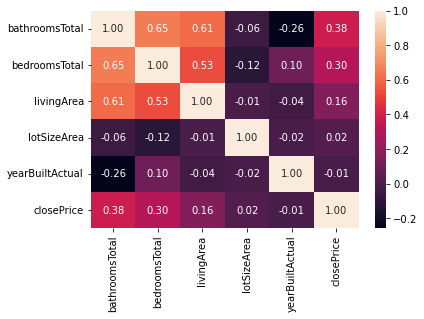

In [14]:
sns.heatmap(house_2.corr(), annot=True, fmt='.2f')

- strong correlation between bathroomsTotal,bedroomsTotal & livingArea. These 3 features are kinda related bcos the higher the no of bedrooms, the higher the no of bathrooms and the higher the no of bedrooms & bathrooms, the higher the livingArea.
- All the numerical columns have a positive correlation with the closePrice with the bathroomsTotal & bedroomsTotal having the strongest correlation

Now let's look at the categorical columns

In [15]:
house_cat = house_2.select_dtypes(include=[object])

In [16]:
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22432 entries, 0 to 22431
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   assessmentClass    22432 non-null  object
 1   zoning             20049 non-null  object
 2   province           22432 non-null  object
 3   city               22432 non-null  object
 4   cityName           22432 non-null  object
 5   neighbourhood      22364 non-null  object
 6   neighbourhoodName  22364 non-null  object
 7   postal             22220 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [17]:
house_cat.describe()

,assessmentClass,zoning,province,city,cityName,neighbourhood,neighbourhoodName,postal
count,22432,20049,22432,22432,22432,22364,22364,22220
unique,6,388,4,8,8,993,947,15914
top,Residential,Residential - Contextual One Dwelling District...,Alberta,ck05d79rf1v0w0791peva9z42,Calgary,ckcqt6fzl04s80770ixifgd4h,Downtown,T3C1G5
freq,16791,2495,16969,9984,9984,260,331,22


- city & cityName give the same information. The city column just an id for each city, so we should not have both columns. cityName makes more sense, so I'll remove city 
- Same goes for the neighbourhood,neighbourhoodName, postal give the same info. I will keep the 'neighbourhoodName' column and remove the remaining two.

In [18]:
house_3 = house_2.drop(labels = ['zoning','city','neighbourhood', 'postal'], axis = 1)
house_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22432 entries, 0 to 22431
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assessmentClass    22432 non-null  object 
 1   bathroomsTotal     19417 non-null  float64
 2   bedroomsTotal      19388 non-null  float64
 3   livingArea         19911 non-null  float64
 4   lotSizeArea        18504 non-null  float64
 5   yearBuiltActual    21841 non-null  float64
 6   province           22432 non-null  object 
 7   cityName           22432 non-null  object 
 8   neighbourhoodName  22364 non-null  object 
 9   closePrice         22432 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.7+ MB


Now the remaining 8 columns will be used to predict the 9th column, closePrice

**Missing Values**

Some of the columns have missing values in certain rows, I will start by removing these missing values because I dont want to introduce bias into the dataset

In [129]:
house_4 = house_3.dropna(axis=0, how ='any')
house_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18985 entries, 0 to 22431
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assessmentClass    18985 non-null  object 
 1   bathroomsTotal     18985 non-null  float64
 2   bedroomsTotal      18985 non-null  float64
 3   livingArea         18985 non-null  float64
 4   lotSizeArea        18985 non-null  float64
 5   yearBuiltActual    18985 non-null  float64
 6   province           18985 non-null  object 
 7   cityName           18985 non-null  object 
 8   neighbourhoodName  18985 non-null  object 
 9   closePrice         18985 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.6+ MB


In [20]:
house_3.cityName.value_counts()

Calgary      9984
Edmonton     6985
Winnipeg     1467
Vancouver    1186
Surrey       1037
Saskatoon     704
Regina        546
Burnaby       523
Name: cityName, dtype: int64

In [21]:
house_4['cityName'].value_counts()

Calgary      8553
Edmonton     4054
Winnipeg     1260
Surrey        825
Saskatoon     429
Regina        384
Vancouver     321
Burnaby       132
Name: cityName, dtype: int64

I have removed almost 30% of the data, which is a big loss, and a lot of data from cities like Burnaby, Vancouver, Regina has been lost.

So instead of removing the missing values, I'd try to impute them instead

**Imputing Missing Values**

In [22]:
#To input the missing values for living area & lotsize Area:
  #group by city, then by  the no of bedrooms, for each no of bedroom& city combo, I'll impute the mean as the missing value.
    
#for each value in column,
#if value is null:
#check the cityName & bedrooms total, if not null; get the average of the living area and impute the value 

In [24]:
#impute the missing living area

for i in range(len(house_3)):
    if pd.isna(house_3['livingArea'][i]) and (not pd.isna(house_3['bedroomsTotal'][i])):
        city_name = house_3['cityName'][i]
        bed_no = house_3['bedroomsTotal'][i]
        
        mean_liv_area = house_3[(house_3['cityName']==city_name) & (house_3['bedroomsTotal']==bed_no)]['livingArea'].mean()
        house_3['livingArea'][i] = mean_liv_area

for i in range(len(house_3)):
    if pd.isna(house_3['livingArea'][i]) and (not pd.isna(house_3['bathroomsTotal'][i])):
        city_name = house_3['cityName'][i]
        bath_no = house_3['bathroomsTotal'][i]
        
        mean_liv_area = house_3[(house_3['cityName']==city_name) & (house_3['bathroomsTotal']==bath_no)]['livingArea'].mean()
        house_3['livingArea'][i] = mean_liv_area

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1812\2183333778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_3['livingArea'][i] = mean_liv_area
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1812\2183333778.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_3['livingArea'][i] = mean_liv_area


In [25]:
#Now lets do the same for lotSizeArea


for i in range(len(house_3)):
    if pd.isna(house_3['lotSizeArea'][i]) and (not pd.isna(house_3['bedroomsTotal'][i])):
        city_name = house_3['cityName'][i]
        bed_no = house_3['bedroomsTotal'][i]
        
        mean_lot_area = house_3[(house_3['cityName']==city_name) & (house_3['bedroomsTotal']==bed_no)]['lotSizeArea'].mean()
        house_3['lotSizeArea'][i] = mean_lot_area

for i in range(len(house_3)):
    if pd.isna(house_3['lotSizeArea'][i]) and (not pd.isna(house_3['bathroomsTotal'][i])):
        city_name = house_3['cityName'][i]
        bath_no = house_3['bathroomsTotal'][i]
        
        mean_lot_area = house_3[(house_3['cityName']==city_name) & (house_3['bathroomsTotal']==bath_no)]['lotSizeArea'].mean()
        house_3['lotSizeArea'][i] = mean_lot_area

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1812\1000872567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_3['lotSizeArea'][i] = mean_lot_area
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1812\1000872567.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_3['lotSizeArea'][i] = mean_lot_area


In [26]:
house_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22432 entries, 0 to 22431
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assessmentClass    22432 non-null  object 
 1   bathroomsTotal     19417 non-null  float64
 2   bedroomsTotal      19388 non-null  float64
 3   livingArea         20008 non-null  float64
 4   lotSizeArea        21743 non-null  float64
 5   yearBuiltActual    21841 non-null  float64
 6   province           22432 non-null  object 
 7   cityName           22432 non-null  object 
 8   neighbourhoodName  22364 non-null  object 
 9   closePrice         22432 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.7+ MB


In [130]:
#Now Lets drop the rows with null values
house_5 = house_3.dropna(axis = 0, subset=['livingArea','lotSizeArea', 'neighbourhoodName', 'bathroomsTotal', 'bedroomsTotal', 'yearBuiltActual'])
house_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18985 entries, 0 to 22431
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assessmentClass    18985 non-null  object 
 1   bathroomsTotal     18985 non-null  float64
 2   bedroomsTotal      18985 non-null  float64
 3   livingArea         18985 non-null  float64
 4   lotSizeArea        18985 non-null  float64
 5   yearBuiltActual    18985 non-null  float64
 6   province           18985 non-null  object 
 7   cityName           18985 non-null  object 
 8   neighbourhoodName  18985 non-null  object 
 9   closePrice         18985 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.6+ MB


**Use only Residential & Condo Properties**

There are some rows that have non residential properties.
Since I'm only interested in predicting houses, I'll remove this data 

In [28]:
house_6 = house_5[house_5.assessmentClass.isin(['Residential', 'Condo'])]

**Shuffle the dataset**

In [48]:
house_6 = house_6.sample(frac=1, random_state=5)

**OneHotEncoding for Categorical Variables**

Since there are columns with categorical values, I'll have to transform these columns to numerical columns using one-hot encoding

Let's look at the categorical columns again.

In [49]:
house_6.select_dtypes(include=[object]).describe()

,assessmentClass,province,cityName,neighbourhoodName
count,18673,18673,18673,18673
unique,2,4,8,873
top,Residential,Alberta,Calgary,Downtown
freq,14459,13950,8362,299


The first 3 columns have very few values which shouldnt result in so many columns.

However, the neighbourhood column has 873 unique features, which will result in 873 columns. 

Let's split the numerical columns & categorical cols into 2 dif datasets & create columns for each unique values in each categorical column

In [50]:
df = house_6.select_dtypes(include=[np.float64])
cat_cols = house_6.select_dtypes(include=[object])
price = house_6['closePrice'].reset_index(drop=True)
price

0        1324800
1         169500
2         242000
3         414800
4         214500
          ...   
18668     563200
18669     249400
18670    1413900
18671     629700
18672     404200
Name: closePrice, Length: 18673, dtype: int64

In [51]:
cat_columns = cat_cols.columns
for col in cat_columns:
    df = pd.concat([df, pd.get_dummies(cat_cols[col], dummy_na=False)], axis=1)
df.shape

(18673, 892)

In [52]:
df.reset_index(inplace=True, drop=True)
df.head()

,bathroomsTotal,bedroomsTotal,livingArea,lotSizeArea,yearBuiltActual,Condo,Residential,Alberta,British Columbia,Manitoba,...,Wolseley,Wood Meadows,Woodbine,Woodcroft,Woodhaven,Woodland Grove,Woodlands,Worthington,York,Yorkville
0,3.1,5.0,3141.0,0.000000,18.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,1074.0,324.287539,19.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,808.0,2478.200000,8.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3.0,866.0,1741.917503,22.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,631.0,0.000000,6.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Exploring the Target Variable** 

Let's check the skew of the price 

In [53]:
price.sort_values(ascending=False)

1250     41870000
3808     14600000
16648     8799700
14830     8499300
12850     8049300
           ...   
14486       37000
1447        36900
3011        36100
8775        36100
263         35900
Name: closePrice, Length: 18673, dtype: int64

Linear Regression makes assumption that there are no outliers and that both independent & target variables follow a normal distribution. 

Let's check if these assumptions are true for this dataset

**Check for Outtliers**

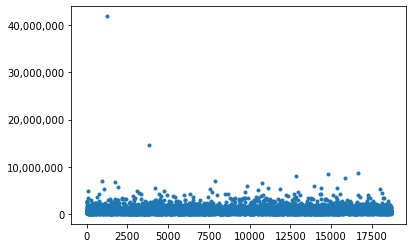

In [54]:
ax = price.plot(style='.')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Looks like there is an outlier. Most of the prices are below 10 million and we have two houses above 10 million

Let's check out 2 more houses

In [55]:
#get their indices
price[price>10000000]

1250    41870000
3808    14600000
Name: closePrice, dtype: int64

In [56]:
df.iloc[[1250,3808],:20]

,bathroomsTotal,bedroomsTotal,livingArea,lotSizeArea,yearBuiltActual,Condo,Residential,Alberta,British Columbia,Manitoba,Saskatchewan,Burnaby,Calgary,Edmonton,Regina,Saskatoon,Surrey,Vancouver,Winnipeg,01 F
1250,2.1,3.0,1185.0,0.0,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3808,5.3,6.0,8563.0,4289.7,96.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


Looks like the two outliers are:
- 1 residential house in British Columbia. This is a 6 bed, 5 bath house in Vancouver. The living area is also significantly higher than others. Considering the housing market in Vancouver, it's possible this value is correct, so I'll leave it.
- 1 condo in Calgary. This is a 3 bed and 2 bath condo. Considering the housing market in Calgary, it's highly unlikely for this condo to be 41 million cad. So I'll remove it.

**Drop the suspected errorneous value**

In [57]:
df = df.drop(index=[1250])
price = price.drop(index=[1250])

**Check the Distribution**

<AxesSubplot:>

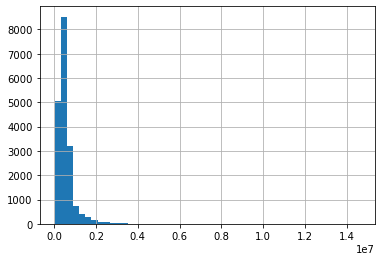

In [58]:
#lets look at the distribution of the data without these two values
price.hist(bins=50)

In [59]:
#get the skew
price.skew()

5.8220719436382256

As shown in the histogram plots & the skew calculation, the target variable is highly skewed 

**Transform the Target Variable to reduce the Skew**

0.06591277977614242

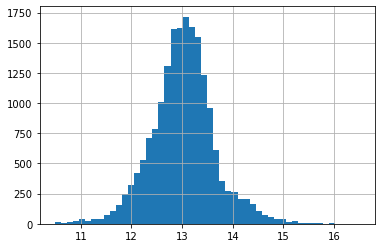

In [60]:
price=np.log(price)
price.hist(bins=50)
price.skew()

Now I have reduced the skew and the target now follows a normal distribution.

0        13.725476
1        13.017003
2        12.886641
3        12.772806
4        13.399995
           ...    
18668    12.074254
18669    13.203759
18670    13.423652
18671    11.636911
18672    12.898219
Name: closePrice, Length: 18672, dtype: float64

**Train/Test Split**

In [61]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df, price, test_size = .20, random_state=42) 

**Feature Scaling (Standard normalization) on the Numerical Columns**

In [62]:
#scale the training set (independent variables) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#scale the test set (independent variables) 
X_test = scaler.transform(X_test)

**Train, Test & Evaluate a LR Model**

In [85]:
lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) 

#Predict and score the model on both train & test set
price_pred_test = lm_model.predict(X_test) 
price_pred_train = lm_model.predict(X_train)

**Transform the target variable back to the original values & Calculate error metrics**

In [88]:
#Train Set
r2_train = r2_score(np.exp(y_train), np.exp(price_pred_train))
adj_r2_train = adjusted_r2(r2_train,len(price_pred_train),892)
rmse_train = mean_squared_error(np.exp(y_train), np.exp(price_pred_train), squared =False)
print("The r-squared score for this model was {} on {} training values.".format(r2_train, len(y_train)))
print("The adjusted r-squared score for this model was {} on {} training values.".format(adj_r2_train, len(y_train)))
print("The RMSE for this model was {} on {} training values.".format(rmse_train, len(y_train)))

#Test Set
print('--------------------------------------------------------\n')
r2_test = r2_score(np.exp(y_test), np.exp(price_pred_test))
adj_r2_test = adjusted_r2(r2_test,len(price_pred_test),892)
rmse_test = mean_squared_error(np.exp(y_test), np.exp(price_pred_test), squared =False)
print("The r-squared score for this model was {} on {} values.".format(r2_test, len(y_test)))
print("The adjusted r-squared score for this model was {} on {} values.".format(adj_r2_test, len(y_test)))
print("The RMSE for this model was {} on {} values.".format(rmse_test, len(y_test)))


The r-squared score for this model was 0.7350187697855528 on 14937 training values.
The adjusted r-squared score for this model was 0.718188574873043 on 14937 training values.
The RMSE for this model was 246231.2341102906 on 14937 training values.
--------------------------------------------------------

The r-squared score for this model was 0.5253785812428874 on 3735 values.
The adjusted r-squared score for this model was 0.37641225276598933 on 3735 values.
The RMSE for this model was 338790.1639814035 on 3735 values.


**Observation**
- Looks like the performance of the model is better on the training set than on the test set.
  So, the model may be overfitting.

- The RMSE of this model on the test set is about 60% of the mean of all the prices and 70% of the SD.

- The adjusted R2 score is 0.3764, which means that only 37.64% of the variance in the price can be explained from the features. What happened to the rest.

- From the above, I can conclude that the model didn't perform well and may be overfitting on the train set.

**Reducing Overfitting With Regularization**

In [ ]:
#Ridge Regression

In [122]:
ridge_model = Ridge(random_state=10, alpha = 100) # Tried a no of alpha values 
ridge_model.fit(X_train, y_train) 

#Predict and score the model on both train & test set
price_pred_test = ridge_model.predict(X_test) 
price_pred_train = ridge_model.predict(X_train)

In [123]:
#Train Set
r2_train = r2_score(np.exp(y_train), np.exp(price_pred_train))
adj_r2_train = adjusted_r2(r2_train,len(price_pred_train),892)
rmse_train = mean_squared_error(np.exp(y_train), np.exp(price_pred_train), squared =False)
print("The r-squared score for this model was {} on {} training values.".format(r2_train, len(y_train)))
print("The adjusted r-squared score for this model was {} on {} training values.".format(adj_r2_train, len(y_train)))
print("The RMSE for this model was {} on {} training values.".format(rmse_train, len(y_train)))

#Test Set
print('--------------------------------------------------------\n')
r2_test = r2_score(np.exp(y_test), np.exp(price_pred_test))
adj_r2_test = adjusted_r2(r2_test,len(price_pred_test),892)
rmse_test = mean_squared_error(np.exp(y_test), np.exp(price_pred_test), squared =False)
print("The r-squared score for this model was {} on {} values.".format(r2_test, len(y_test)))
print("The adjusted r-squared score for this model was {} on {} values.".format(adj_r2_test, len(y_test)))
print("The RMSE for this model was {} on {} values.".format(rmse_test, len(y_test)))

The r-squared score for this model was 0.7505338627066901 on 14937 training values.
The adjusted r-squared score for this model was 0.7346891037729367 on 14937 training values.
The RMSE for this model was 238913.88311250813 on 14937 training values.
--------------------------------------------------------

The r-squared score for this model was 0.6012401025462406 on 3735 values.
The adjusted r-squared score for this model was 0.4760839348725061 on 3735 values.
The RMSE for this model was 310536.6504756244 on 3735 values.


**Observation**
- This ridge regression model performs better than the simple linear regression model, even though the performance on the train set is still higher.
- I noticed the performance on the test set was improving with higher values of alpha, but it still needs to be further improved

### Conclusion

I have been able to implement a model that can predict the price of the houses. However, more work needs to be done to improve the performance.

### Future Work
- Improve the performance of the Linear Regression Model.
- Implement other Regression Models & compare their performance